# Titanic dataset

## VARIABLE DESCRIPTIONS
Pclass =  Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survived =  Survival (0 = No; 1 = Yes)

Sibsp = Number of Siblings/Spouses Aboard

Parch = Number of Parents/Children Aboard

Ticket = Ticket Number

Fare = Passenger Fare (British pound)

Embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv(r'D:\ML_WORK\Kaggle\Titanic\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
category = ['Pclass', 'Sex', 'SibSp','Parch','Embarked','Survived'] 

In [4]:
# Master = Childers
Master = []
for i in df.Name:
    if re.search('Master.',i):
        Master.append(i)

In [5]:
df_gender = df[(df['Name'].isin(Master))]

In [6]:
survived = df_gender[df_gender['Survived'] == 1]

In [7]:
Died = df_gender[df_gender['Survived'] == 0]


In [8]:
summary = pd.DataFrame(df_gender.Age.describe())


In [9]:
def barpieplot (data= None, x=None, width =None, height= None ):
    value_counts = data[x].value_counts() #values
    label = value_counts.index # labels

    # Pie chart
    plt.figure(figsize=(width,height))
    plt.subplot(1,2,1)
    plt.axis('equal')
    plt.pie(value_counts,labels=label, autopct='%0.2f%%',radius=1.7)
   
    plt.legend()

    # bar plot
    plt.subplot(1,2,2)
    for i,j in zip(label, value_counts):
        plt.bar(str(i),j, label= i)
    plt.legend()
    plt.xlabel(value_counts,fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(x,fontsize=15)
       

## Summury

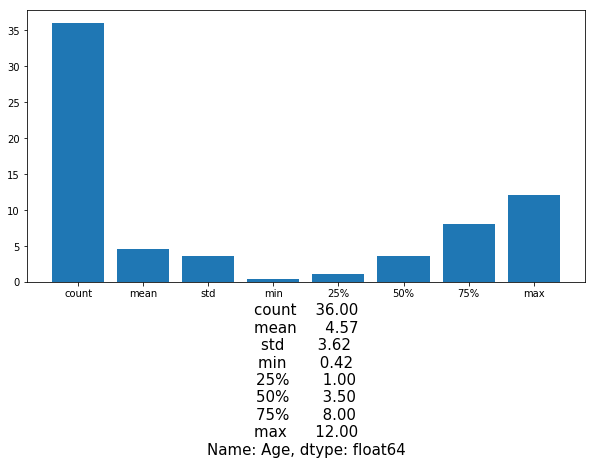

In [85]:
plt.figure(figsize=(10,5))
plt.bar(df_gender.Age.describe().index.tolist(), df_gender.Age.describe().values.tolist())
plt.xlabel(np.round(df_gender.Age.describe(),decimals=2),fontsize=15)
plt.show()

## outlier detection

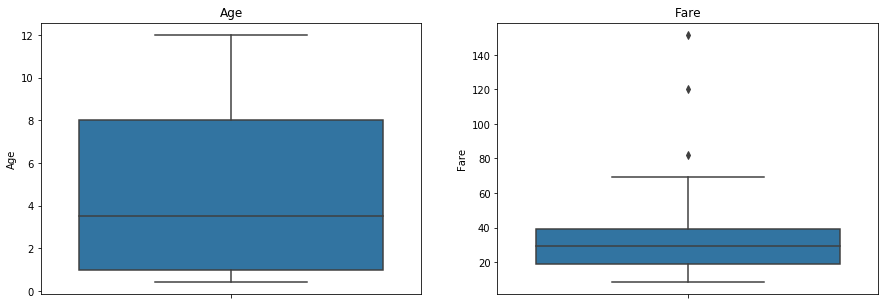

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_gender,y='Age')
plt.title('Age')

plt.subplot(1,2,2)
sns.boxplot(data=df_gender,y='Fare')
plt.title('Fare')

plt.show()

* No outlier in Age

* outlier exists in fare

# survived = Survival (0 = No; 1 = Yes)

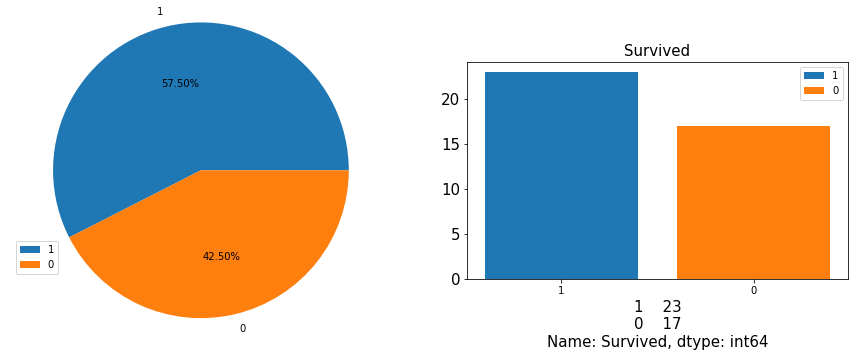

In [11]:
barpieplot(data=df_gender, x='Survived', width=15, height=4)

## Pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

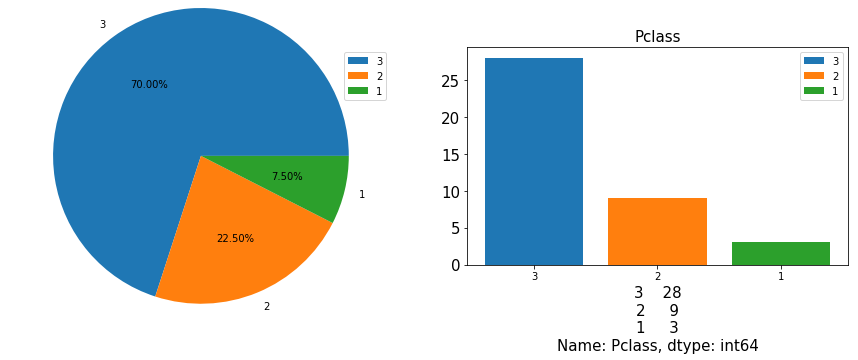

In [12]:
barpieplot(data=df_gender, x='Pclass',width=15,height=4)


* Out of total 70% childerns belongs to 3rd classs of passenger class

##  survived as per thier respective passenger class

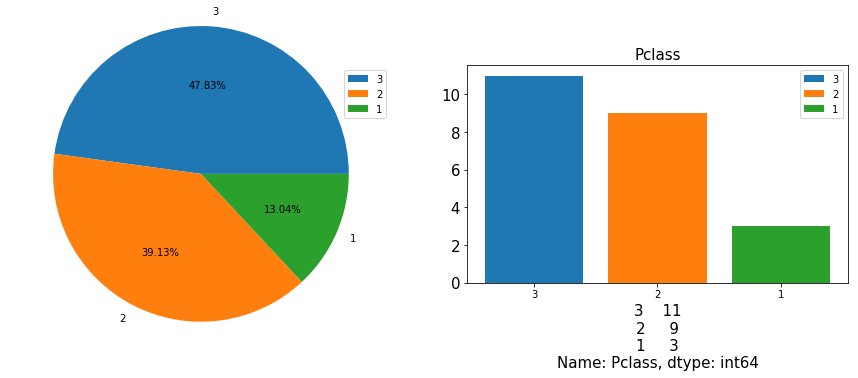

In [13]:
barpieplot(data=survived,x='Pclass',width=15,height=4)

* All the childerns from passenger class 1st and 2nd are survived

## Number of boys died in thier passenger class

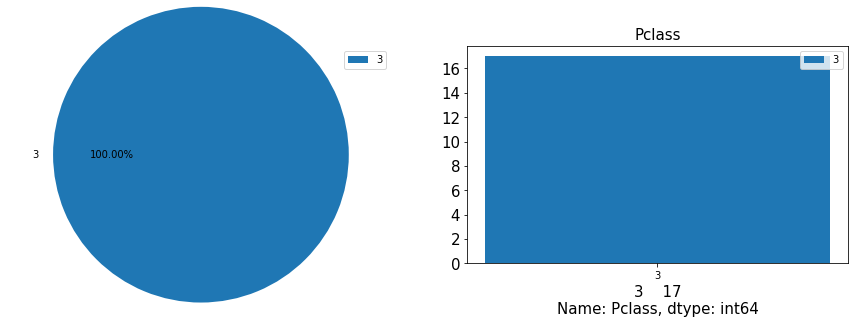

In [14]:
barpieplot(data=Died,x='Pclass',width=15,height=4)

* Died boys belongs to 3rd classs of passenger class

## Boys Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) 

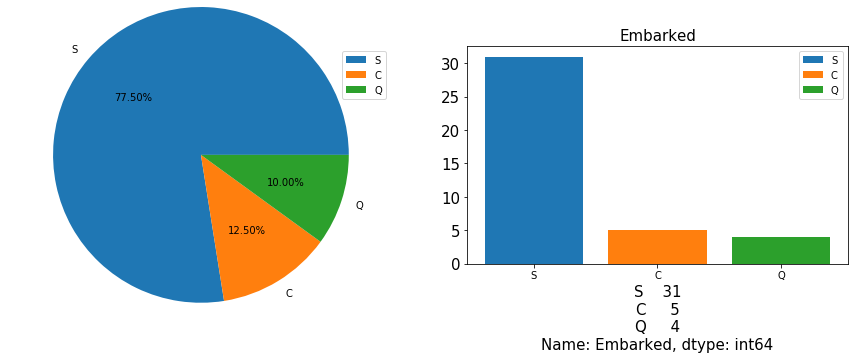

In [15]:
barpieplot(data=df_gender,x='Embarked',width=15,height=4)

* Emabakation of childrens from Southampton is significantly high
* Emabakation of childrens from others is significantly low

## Survival of boys as per their port of embarkation

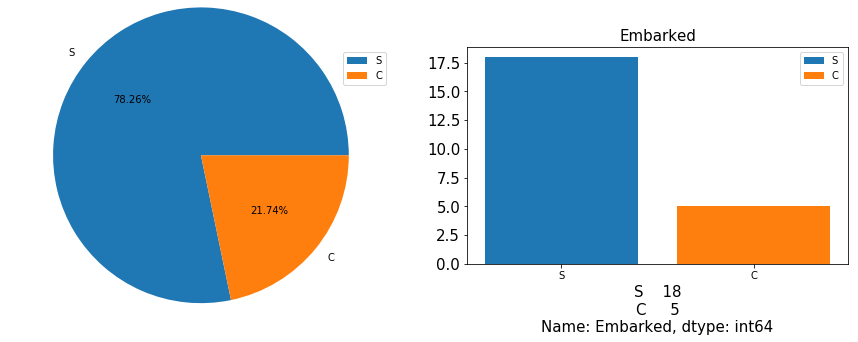

In [16]:
barpieplot(data=survived,x='Embarked',width=15,height=4)

* out of 31 boys 18 survived embarked from  Southampton

* All the boys survived embarked from Cherbourg 

## Not survival of boys as per their port of embarkation


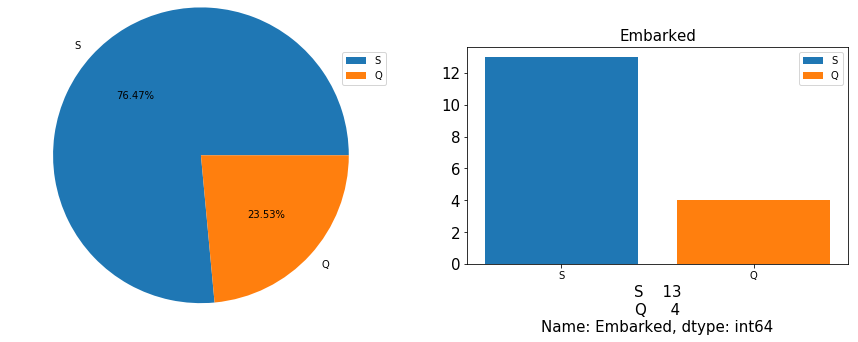

In [17]:
barpieplot(data=Died,x='Embarked',width=15,height=4)

* out of 31 boys 13 not survived embarked from  Southampton

* All the boys not survived embarked from Queenstown 

# Number of Siblings/Spouses Aboard

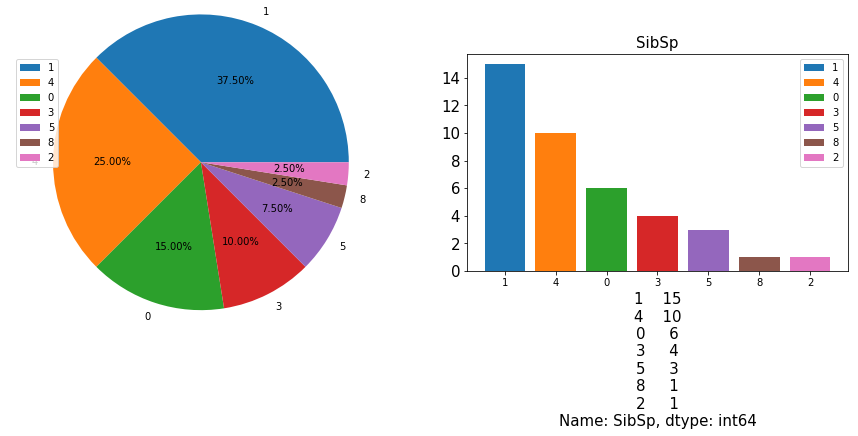

In [72]:
barpieplot(data=df_gender,x='SibSp',width=15,height=4)

## survived

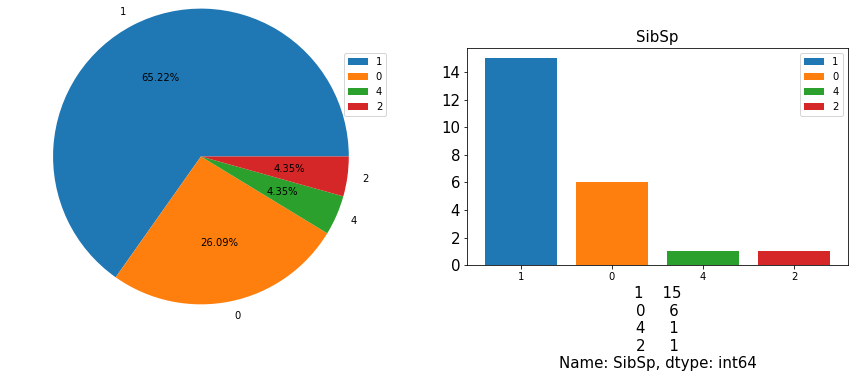

In [74]:
barpieplot(data=survived,x='SibSp',width=15,height=4)

## Not survived

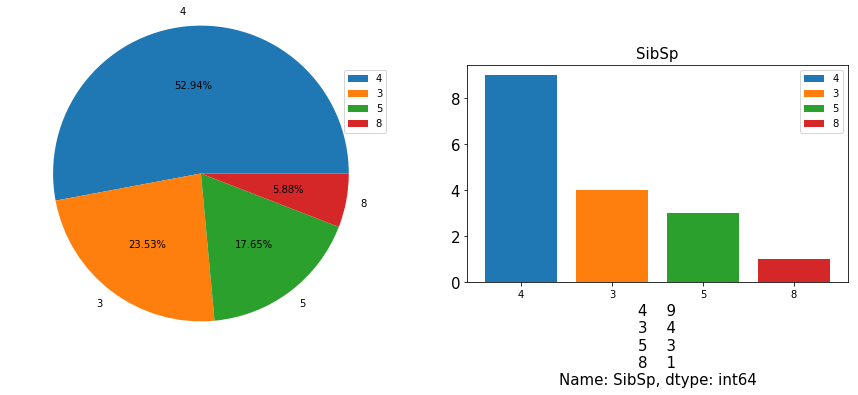

In [75]:
barpieplot(data=Died,x='SibSp',width=15,height=4)

# Parch = Number of Parents/Children Aboard

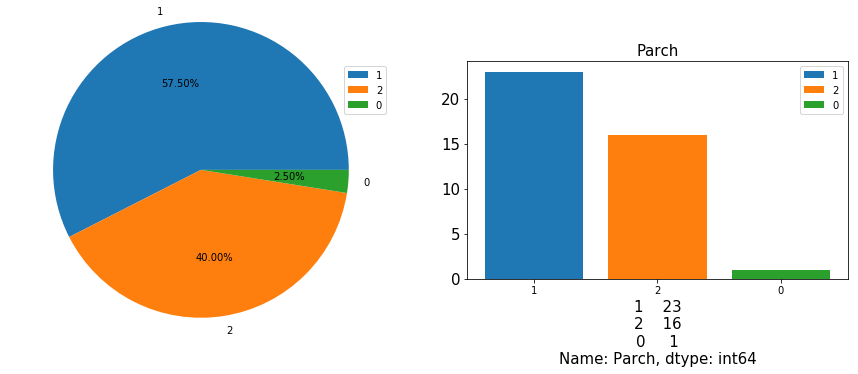

In [79]:
barpieplot(data=df_gender,x='Parch',width=15,height=4)

## survived

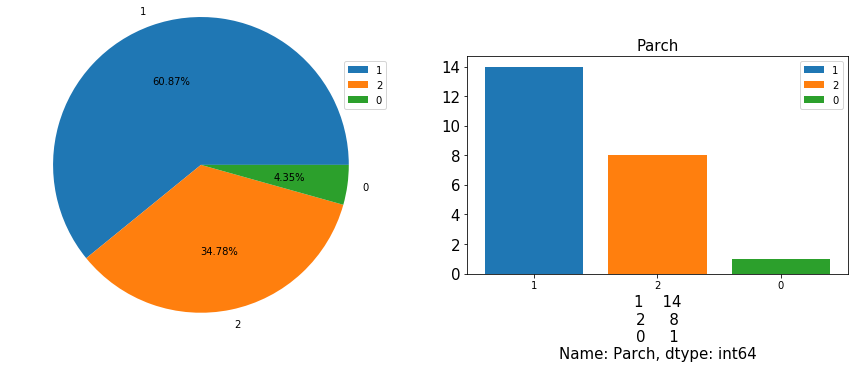

In [83]:
barpieplot(data=survived,x='Parch',width=15,height=4)

# Not survived

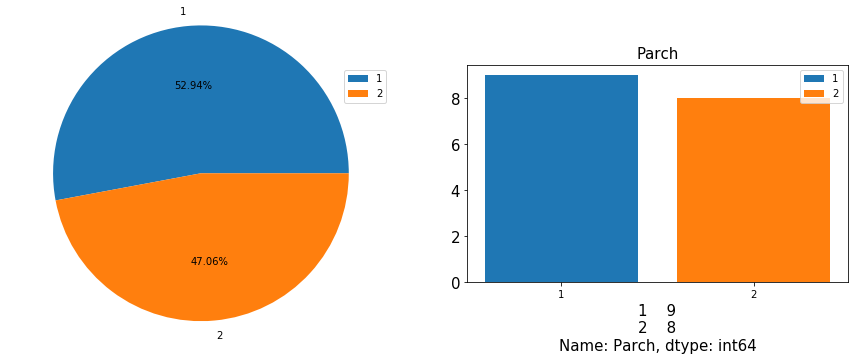

In [84]:
barpieplot(data=Died,x='Parch',width=15,height=4)